## **Percolation in Erdős-Rényi networks**

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

rng = np.random.default_rng()

Erdős-Rényi (ER) networks are random networks where $N$ nodes are randomly connected such that the probability that a pair of nodes is linked is $p$.
In network science, ER networks are important because they provide the simplest reference to which one can compare real-world networks. In this exercise, we will analyze the percolation properties of ER networks.

## **a) Visualization**

We start by visualizing the percolation process in a relatively small ER network. Create ER networks, each with $N = 500$ nodes and average degree $\langle k \rangle = [0.7, 0.9, 1.1, 1.3, 1.5]$, respectively. **Visualize** each network with the nodes in the largest component in red and the other nodes in grey.

In [ ]:
def link_probability_of_ER_network(n, avg_degree):
    '''
    Return the probability of a link between any two nodes in an ER network
    given the number of nodes n and average degree avg_degree.
    '''
    p = avg_degree / (n - 1)
    return p


In [ ]:
def largest_component(G):
    '''
    Return the largest component of a graph G as a set of nodes.
    '''
    # Find the connected components in the graph G
    components = list(nx.connected_components(G))

    # Find the largest component among all the connected components
    largest_component = max(components, key=len)

    return largest_component


In [ ]:
# NO NEED TO MODIFY THIS FUNCTION
def draw_largest_component(ax, G):
    '''
    Draw a networkx graph G on a matplotlib axis ax, with the largest component
    highlighted in red and the rest of the nodes in grey.
    '''
    nodes_in_lc = largest_component(G)
    k_spring = 2 * G.number_of_edges() * (G.number_of_nodes())**(-1.5)
    pos = nx.spring_layout(G, k=k_spring)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_lc,
                           node_size=10, node_color="red", ax=ax, alpha=0.5)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(nodes_in_lc),
                           node_size=10, node_color="grey", ax=ax, alpha=0.5)
    nx.draw_networkx_edges(G, pos=pos, width=0.5, alpha=0.3, ax=ax)

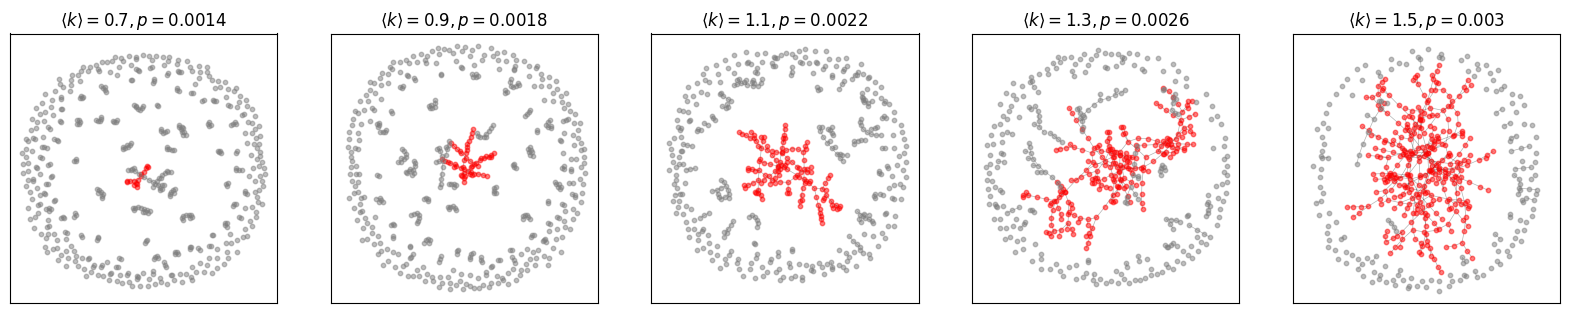

In [ ]:
fig_vis, axes_vis = plt.subplots(1, 5, figsize=(20, 3.5))
n = 500
avg_degrees = [0.7, 0.9, 1.1, 1.3, 1.5]
for i, avg_degree in enumerate(avg_degrees):
    p = link_probability_of_ER_network(n, avg_degree)
    G = nx.fast_gnp_random_graph(n, p, seed=rng)
    draw_largest_component(axes_vis[i], G)
    axes_vis[i].set_title(r"$\langle k \rangle = {:.1f}, p = {:.2g}$".format(avg_degree, p))

## **b) Largest component size**
To understand how the size of the largest component depends on the average degree, and how they differ for different network sizes, **make a plot** of the fraction of nodes in the largest component as a function of the average degree $\langle k \rangle$ scanned between $0$ and $2.5$ in steps of $0.1$, i.e., $\langle k \rangle = [0, 0.1, 0.2, \dots, 2.5]$. Consider networks with $N = [50, 500, 5000, 50000]$ nodes. By looking at the plots, **estimate** the percolation threshold, i.e., the value of $\langle k \rangle$ for which a giant component starts to appear.

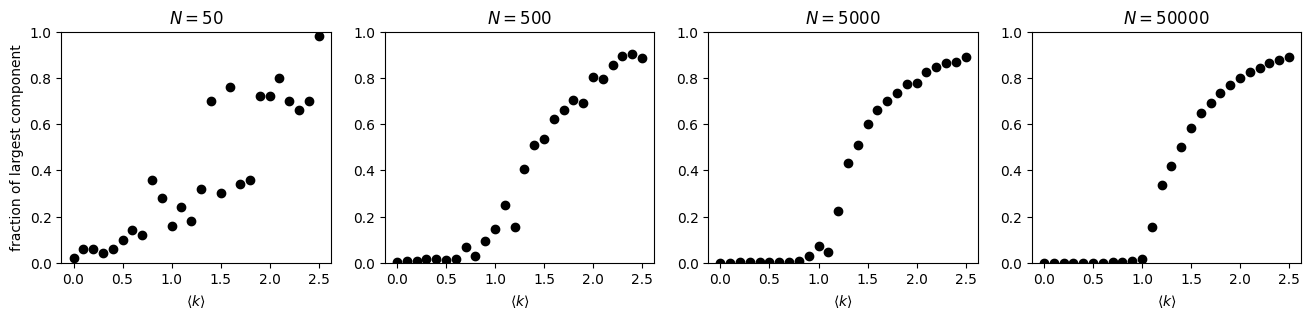

In [ ]:
# Function to calculate the fraction of the largest component for a given average degree and network size
def calculate_largest_component_fraction(N, avg_degree):
    largest_component_fractions = []
    for k in avg_degree:
        p = k / (N - 1)
        G = nx.fast_gnp_random_graph(N, p)
        largest_component = len(max(nx.connected_components(G), key=len))
        largest_component_fraction = largest_component / N
        largest_component_fractions.append(largest_component_fraction)
    return largest_component_fractions

network_sizes = [50, 500, 5000, 50000]
avg_degrees = np.arange(0, 2.6, 0.1)

fig_diffsizes, axes_diffsizes = plt.subplots(1, 4, figsize=(16, 3))

for i, n in enumerate(network_sizes):
    largest_component_fractions = calculate_largest_component_fraction(n, avg_degrees)
    axes_diffsizes[i].plot(avg_degrees, largest_component_fractions, 'o', color='black')
    axes_diffsizes[i].set_title(r"$N = {}$".format(n))
    axes_diffsizes[i].set_xlabel(r"$\langle k \rangle$")
    axes_diffsizes[i].set_ylim(0, 1)

axes_diffsizes[0].set_ylabel("fraction of largest component")

plt.show()

## **c) Percolation threshold and susceptibility**
Another, more elegant way to find out when the percolation transition happens is to find the point at which the probability for the largest component size growth is the highest, as the control parameter (here $\langle k \rangle$ or $p$) is changed very little. Think about the situation where $\langle k \rangle$ is changed so slightly that a single link is added between the largest component and a randomly selected node that is not in the largest component. The expected change in the largest component size in this situation is sometimes called *susceptibility*, and it should get a large value at the percolation threshold. The susceptibility depends on the size distribution of all the other components, and it can be calculated with the following formula:
\begin{equation}
\chi = \frac{(\sum_i i^2 C(i)) - S_{max}^2}{(\sum_i i C(i)) - S_{max}} \,,
\end{equation}
where $C(i)$ is the number of components with $i$ nodes. **Calculate** the susceptibility $\chi$ for networks with $N = 100000$ and $\langle k \rangle = [0, 0.1, 0.2, \dots, 2.5]$, and **plot** $\chi$ as a function of $\langle k \rangle$. **Estimate** the percolation threshold by observing the peak of the susceptibility.

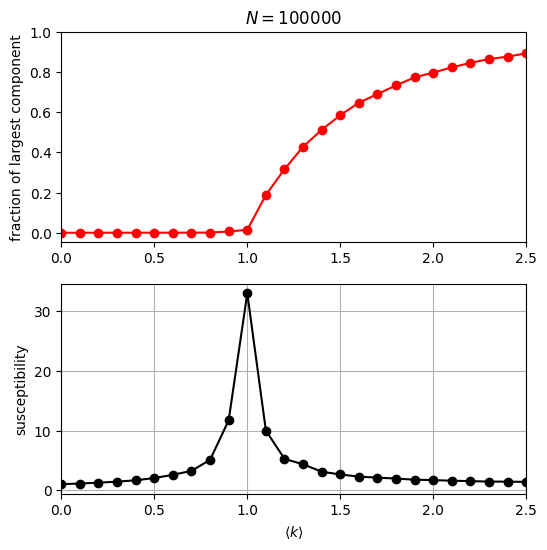

In [ ]:
n = 100000
avg_degrees = np.arange(0, 2.6, 0.1)

fig_susc, axes_susc = plt.subplots(2, 1, figsize=(6, 6))

largest_component_fractions = []
susceptibilities = []

for avg_k in avg_degrees:
    G = nx.fast_gnp_random_graph(n, avg_k / (n - 1))
    components = [len(c) for c in nx.connected_components(G)]
    components.sort(reverse=True)
    S_max = components[0]

    sum_i2_C_i = sum([i**2 * components.count(i) for i in set(components)])
    sum_i_C_i = sum([i * components.count(i) for i in set(components)])

    susceptibility = (sum_i2_C_i - S_max**2) / (sum_i_C_i - S_max)

    largest_component_fractions.append(S_max / n)
    susceptibilities.append(susceptibility)

axes_susc[0].plot(avg_degrees, largest_component_fractions, 'o-', color='red')
axes_susc[1].plot(avg_degrees, susceptibilities, 'o-', color='black')
axes_susc[0].set_title(r"$N = {}$".format(n))
axes_susc[1].set_xlabel(r"$\langle k \rangle$")
for i in range(2):
    axes_susc[i].set_xlim(0, 2.5)
axes_susc[0].set_ylim(top=1)
axes_susc[0].set_ylabel("fraction of largest component")
axes_susc[1].set_ylabel("susceptibility")
axes_susc[1].grid()

## **e)  (challenge exercise)**
Using numerical simulations, **calculate** the $n_d$ value for $d \in \{0 \dots 15\} $, $\langle k \rangle \in \{ 0.5, 1, 2\} $, starting from a set of randomly selected nodes and taking averages to get a good estimate for the expected value. Try out two network sizes: $N=10^4$ and $N=10^5$ to see how size affects your calculations. **Present a plot** of mean $n_d$ as a function of $d$ for different values of $\langle k \rangle$.

**Hint**: A reasonable number for starting nodes can be anywhere from hundreds to thousands based on how fast your computer and your simulation code is. With a moderately recent computer and an efficient implementation of the algorithm, you should be able to simply use the parameters provided in the template. (Same for the next exercise as well.)

In [ ]:
# NO NEED TO MODIFY THIS FUNCTION
def calculate_loop_edge_fraction(network, visited_nodes, boundary_nodes):
    """
    Calculates the number of edges that go from the boundary to already visited
    nodes in addition to the number of edges that are expected if the network is
    a tree. This number is then divided by the number of edges in total that go
    from the boundary to the visited nodes.

    In the case that the there are zero edges from the boundary to the visited
    nodes, this function returns zero (i.e., in the beginning when the boundary
    set is the same as the visited nodes).

    In the case that in breadth-first search all the reachable nodes have been
    already discovered, this function returns NaN.

    Parameters
    ----------
    network : networkx.Graph object
    visited_nodes : set
        The set of nodes that are visited (including the boundary)
    boundary_nodes : set
        The set of nodes that are in the boundary, i.e., the nodes visited in
        the last iteration.

    Returns
    -------
    The fraction described above : float or NaN

    """
    if len(visited_nodes) == 1:
        return 0

    if len(boundary_nodes) == 0:
        #all the reachable nodes have been visited before
        return(np.nan)

    edge_count = 0

    for node in boundary_nodes:
        for neighbor in network[node]:
            if neighbor in visited_nodes or neighbor in boundary_nodes:
                edge_count += 1

    if edge_count != 0:
        loop_count = edge_count - len(boundary_nodes)
        assert loop_count >= 0
        return loop_count / edge_count
    else:
        return 0

In [ ]:
def expand_breadth_first_search(network, visited_nodes, boundary_nodes):
    """
    Performs one step in a breadth-first search and updates the visited nodes
    and boundary nodes sets that are given as parameters accordingly. Here one
    step means that we will find all nodes that are one step further away from
    the starting node. These nodes will form the new boundary.

    Parameters
    ----------
    network : networkx.Graph object
    visited_nodes : set
      The set of nodes that are visited (including the boundary)
    boundary_nodes : set
      The set of nodes that are in the boundary, i.e., the nodes visited in
      the last iteration.

    Returns
    -------
    new_visited_nodes : set object
        The new and updated set of visited nodes after exploring one more step
    new_boundary_nodes : set object
        The new set of boundary nodes after exploring for one more step
    """

    new_boundary_nodes = set()
    new_visited_nodes = set(visited_nodes)

    # Iterate through all nodes in the "boundary_nodes" set
    for node in boundary_nodes:
        # Get the neighbors of the current node
        neighbors = set(network.neighbors(node))
        # Filter out neighbors that are already visited
        unvisited_neighbors = neighbors - visited_nodes
        # Update the "new_visited_nodes" with the unvisited neighbors
        new_visited_nodes.update(unvisited_neighbors)
        # Update the "new_boundary_nodes" with the unvisited neighbors
        new_boundary_nodes.update(unvisited_neighbors)

    return new_visited_nodes, new_boundary_nodes


In [ ]:
def iterate_breadth_first_search(network, sample_size, max_depth, rng):
    '''
    Performs a number of breadth-first searches from random starting points
    on randomly generated ER networks and calculates the average number of nodes
    (i.e. number of boundary nodes) and the fraction of looping edges encountered
    at each step.

    Parameters
    ----------
    network : networkx.Graph object
    sample_size : int
        The number of randomly selected starting nodes for the BFS
    max_depth : int
        The maximum depth of the BFS
    rng : numpy.random.Generator object

    Returns
    -------
    avg_node_count : list
        List of max_depth+1 floats, where index d is the expected size of the
        boundary d steps from a randomly selected source.
    avg_loop_edge_fraction: list
        List of max_depth+1 floats, where index d is the expected fraction of
        looping edges d steps from a randomly selected source.
    '''

    # Initialize lists to store results for each depth
    node_count = [[] for _ in range(max_depth + 1)]
    loop_edge_fraction = [[] for _ in range(max_depth + 1)]

    # Choose random starting nodes for the BFS
    start_nodes = rng.choice(list(network.nodes()), size=sample_size, replace=False)

    # Run BFS for each starting node
    for start_node in start_nodes:
        visited_nodes = set()
        boundary_nodes = set()

        visited_nodes.add(start_node)
        boundary_nodes.add(start_node)

        for depth in range(max_depth + 1):
            # Perform one step of BFS using `expand_breadth_first_search()`
            visited_nodes, boundary_nodes = expand_breadth_first_search(network, visited_nodes, boundary_nodes)
            # Calculate the number of nodes at the boundary for the current depth
            node_count[depth].append(len(boundary_nodes))
            # Calculate the fraction of looping edges for the current depth
            loop_edge_fraction[depth].append(calculate_loop_edge_fraction(network, visited_nodes, boundary_nodes))

    # Calculate the average of node counts and loop edge fractions
    avg_node_count = [np.mean(node_counts_at_depth) for node_counts_at_depth in node_count]
    avg_loop_edge_fraction = [np.nanmean(loop_edge_fractions_at_depth) for loop_edge_fractions_at_depth in loop_edge_fraction]

    return avg_node_count, avg_loop_edge_fraction



In [ ]:
def plot_er_bfs_results(net_size, avg_degrees, sample_sizes, rng, max_depth=15):
    """
    For each average degree, creates an ER network of given size, performs breadth-
    first searches from random sources, and plots average boundary size and
    average loop fraction as a function of depth of BFS.

    Note that the actual breadth-first searches are performed by calling the
    function `iterate_breadth_first_search()`. This function is mainly concerened
    with plotting and comparison to the theoritical results.

    Parameters
    ----------
    net_size : int
        The number of nodes in the ER networks
    avg_degrees : list of floats
        List of average degrees of the ER networks
    sample_sizes : list of ints
        List of numbers of randomly selected starting node for the BFS
        An ER network with avg_degrees[i] will be sampled sample_sizes[i] times.
        avg_degrees and sample_sizes must have the same length.
    rng : numpy.random.Generator object
    max_depth : int
        The maximum depth of the BFS

    Returns
    -------
    fig : figure object
    """
    num_cols = len(avg_degrees)
    fig, axes = plt.subplots(2, num_cols, figsize=(3 * num_cols, 6),
                             layout="constrained")

    for i, avg_degree in enumerate(avg_degrees):
        p = link_probability_of_ER_network(net_size, avg_degree)
        ER_network = nx.fast_gnp_random_graph(net_size, p, seed=rng)
        avg_node_count, avg_loop_edge_fraction = iterate_breadth_first_search(ER_network, sample_sizes[i], max_depth, rng)

        # Calculating the theoretical values, assuming the network is a tree
        avg_node_count_theoretical = []
        for depth in range(max_depth + 1):
            n_d = avg_degree**depth
            avg_node_count_theoretical.append(n_d)

        ax = axes[0, i]
        ax.plot(list(range(max_depth+1)), avg_node_count_theoretical,
                lw=1.5, c='tab:blue', label="Theoretical")
        ax.plot(list(range(max_depth+1)), avg_node_count, "x",
                lw=2, c='tab:red', label="Simulation")
        ax.set_yscale("log")

        ax.set_xlabel("Depth") # Set proper axis labels!
        ax.set_ylabel("Avarage node count") # Set proper axis labels!
        ax.set_xlim(0, max_depth)
        ylim = ax.get_ylim()
        if ylim[0] > 0.1 and ylim[1] < 10:
            ax.set_ylim(min(0.1, ylim[0]), max(10, ylim[1]))
        if ylim[1] > net_size:
            # Plot the size of the network as a dotted horizontal line
            ax.plot([0, max_depth], 2*[net_size], "k--")
        ax.legend()
        ax.set_title(r"$\langle k \rangle = {:.1f}$".format(avg_degree))

        ax = axes[1, i]
        ax.plot(list(range(max_depth+1)), avg_loop_edge_fraction, "x",
                lw=2, c='tab:red', label="Simulation")
        ax.set_xlabel("Depth") # Set proper axis labels!
        ax.set_ylabel("Average loop edge fraction") # Set proper axis labels!
        ax.set_xlim(0, max_depth)
        ax.set_ylim(-0.02, 1)

    return fig

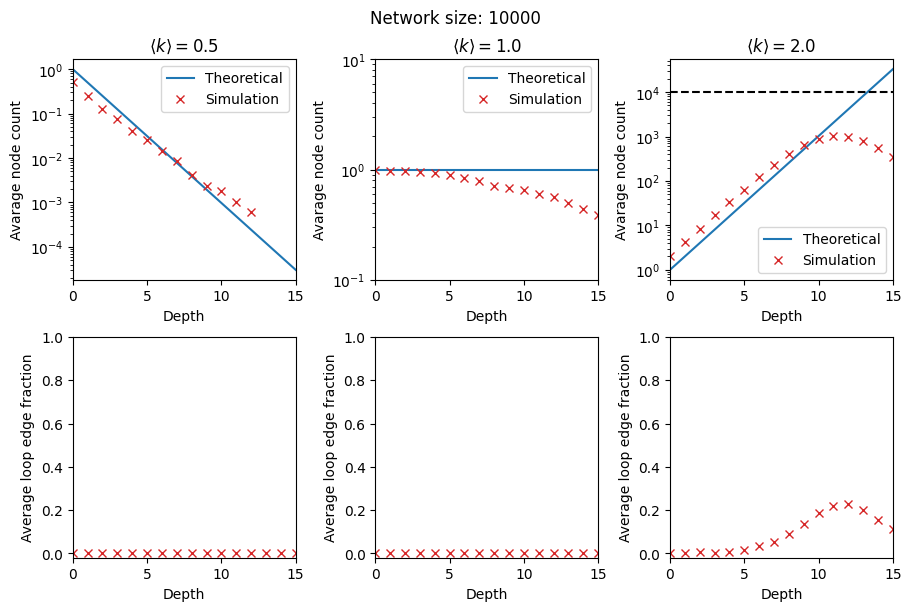

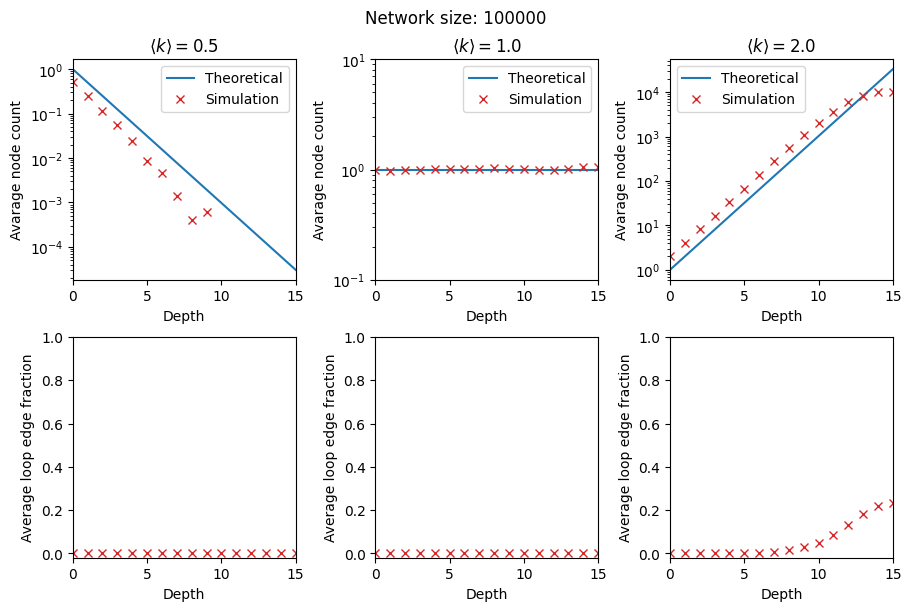

In [ ]:
average_degrees = [0.5, 1, 2]
sample_sizes = [5000, 5000, 100]
net_size = [10**4, 10**5]

for n in net_size:
    fig = plot_er_bfs_results(n, average_degrees, sample_sizes, rng)
    fig.suptitle("Network size: {}".format(n))
    #fig.savefig("BFS_n{}.pdf".format(n), bbox_inches="tight")

## **Error and attack tolerance of networks**


The error and attack tolerance of networks is often characterized using percolation analysis, where edges are removed from the network according to different rules. Typically this kind of analyses are performed on infrastructure networks, such as power-grids or road networks. In this exercise, we will apply this idea to a network of the users of Facebook-like website, and focus on the role of strong and weak edges in the network. In this network, each node corresponds to a user and an edge between two nodes represents contact, in form of messages, between the two users. Additionally, an integer "weight" value is assigned to each edge that corresponds to the number of messages exchanged between the users. As opposed to a non-weighted network where nodes are either connected or disconnected, here a higher or lower weight on am edge shows a stronger or weaker relation between pairs of users.

In the file `OClinks_w_undir.edg`, the three entries of each row describe a weighted edge:
`(node_i node_j w_ij)`,
where the last entry `w_ij` is the weight of the edge between nodes `node_i` and `node_j`.

Your task is to remove edges one by one from the network in the order of:
1. descending edge weight (i.e. remove strong links first),
2. ascending edge weight (i.e. remove weak links first),
3. random order.

In addition, try removing nodes one by one in the order of:
4. descending node strength (i.e. remove nodes with high strength first),
5. ascending node strength (i.e. remove nodes with low strength first),
6. random order.
When you remove a node, remove also all edges of the removed node.

While removing edges/nodes, monitor the fraction of nodes in the largest component $S$ as a function of the fraction of removed edges/nodes $f \in [0,1]$.

**Visualize** $S$ as a function of $f$ in all three cases **in one plot**. There should be clear differences between all three curves. **Explain** the results in five to ten sentences.  To which of the six approaches is the network most and least vulnerable? In other words, in which case does the giant component shrink the fastest/slowest? What is the difference between node removal and edge removal and between different removal strategies? What does it imply about the structure of the network?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import random
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
network_path = "/content/drive/MyDrive/Complex Networks /OClinks_w_undir.edg"
fblike_net = nx.read_weighted_edgelist(network_path, nodetype=int)
print('Number of nodes: {}'.format(fblike_net.number_of_nodes()))

Number of nodes: 1899


In [ ]:
def calc_largest_component_size(G):
    '''
    Returns the number of nodes in the largest component of the graph G
    '''
    largest_component = max(nx.connected_components(G), key=len)
    lcsize = len(largest_component)
    return lcsize

In [ ]:
def lc_sizes_sequential_edge_removal(original_G, order_removal):
    """
    Calculates the size of the largest component under a sequential edge removal process.

    Parameters
    ----------
    original_G : networkx.Graph
        The original network
    order_removal : list of tuples
        Edges sorted in the order in which they will be removed

    Returns
    -------
    lc_sizes : list of int
        The size of the largest component under sequential edge removal process.
        Sampled every time additional 1% of the original edges are removed.
        lc_sizes[0] is the size of the largest component of the original network.
    """

    G = original_G.copy()

    lc_sizes = []

    n_edges = G.number_of_edges()
    sample_freq = math.ceil(n_edges / 100)

    for i, edge in enumerate(order_removal):
        G.remove_edge(edge[0],edge[1])
        if i % sample_freq == 0:
            lc_size = calc_largest_component_size(G)
            lc_sizes.append(lc_size)

    return lc_sizes

In [ ]:
def lc_sizes_sequential_node_removal(original_G, order_removal):
    """
    Calculates the size of the largest component under a sequential node removal process.

    Parameters
    ----------
    original_G : networkx.Graph
        The original network
    order_removal : list of int
        Nodes sorted in the order in which they will be removed

    Returns
    -------
    lc_sizes : list of int
        The size of the largest component under sequential node removal process.
        Sampled every time additional 1% of the original nodes are removed.
        lc_sizes[0] is the size of the largest component of the original network.
    """

    G = original_G.copy()

    lc_sizes = []

    n_nodes = G.number_of_nodes() # removes the node n and all adjacent edges.
    sample_freq = math.ceil(n_nodes / 100)

    for i, node in enumerate(order_removal):
      G.remove_node(node)
      if i % sample_freq == 0:
        lc_size = calc_largest_component_size(G)
        lc_sizes.append(lc_size)

    return lc_sizes


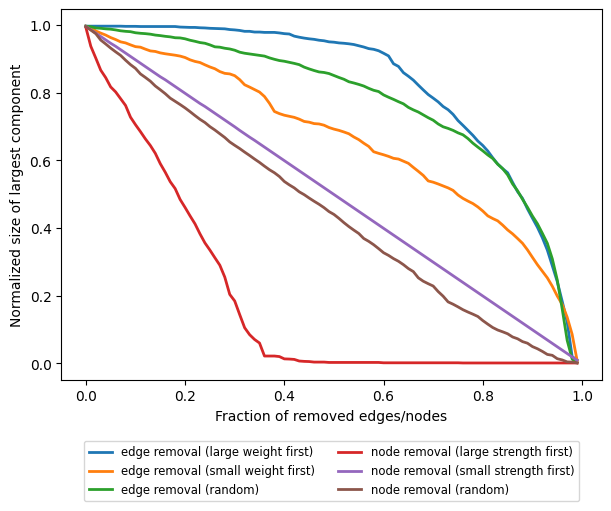

In [ ]:
G = fblike_net # original graph

decr_weight_edge_order = sorted(G.edges(data='weight'), key=lambda x: x[2], reverse=True)
incr_weight_edge_order = sorted(G.edges(data='weight'), key=lambda x: x[2])
random_edge_order = list(G.edges())
random.shuffle(random_edge_order)



node_strengths = {node: sum(data['weight'] for _, _, data in fblike_net.edges(node, data=True)) for node in fblike_net.nodes()}
decr_strength_node_order = [node for node, _ in sorted(node_strengths.items(), key=lambda item: item[1], reverse=True)]
incr_strength_node_order = [node for node, _ in sorted(node_strengths.items(), key=lambda item: item[1])]
random_node_order = list(fblike_net.nodes())
random.shuffle(random_node_order)

# Visualization
fig, ax = plt.subplots(figsize=(6, 5), layout='constrained')
num_nodes = G.number_of_nodes()

# Run edge/node removal and calculate component sizes
for name, edge_order in [('edge removal (large weight first)', decr_weight_edge_order),
                         ('edge removal (small weight first)', incr_weight_edge_order),
                         ('edge removal (random)', random_edge_order)]:

    lc_sizes = lc_sizes_sequential_edge_removal(G, edge_order)
    ax.plot(np.arange(len(lc_sizes))*0.01, np.array(lc_sizes) / num_nodes, lw=2, label=name)



for name, node_order in [('node removal (large strength first)', decr_strength_node_order),
                         ('node removal (small strength first)', incr_strength_node_order),
                         ('node removal (random)', random_node_order)]:

    lc_sizes = lc_sizes_sequential_node_removal(G, node_order)
    ax.plot(np.arange(len(lc_sizes))*0.01, np.array(lc_sizes) / num_nodes, lw=2, label=name)



ax.set_xlabel('Fraction of removed edges/nodes')
ax.set_ylabel('Normalized size of largest component')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fontsize='small')